In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from settings import BASE_DIR

/home/paridhi/AARC/Projects/carla_simulations


In [3]:


def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded data as a DataFrame.
    """
    full_path = f"{BASE_DIR}/{file_path}"
    df = pd.read_csv(full_path)
    return df

In [70]:
# load recorded data
data = load_data("Reports/sim_data_FS_IDM_avg_ref_nV_3_ref25_f0.02.csv")
data.head(10)

,time,name,x,y,z,speed,acc,gap,command_velocity,reference_velocity,rel_velocity,quadratic_region
0,100.02,leader,9500.0,0.000000e+00,0.499925,0.027098,0.0,NaN,NaN,NaN,NaN,"(0, 0, 0)"
1,100.02,follower_0,9508.0,0.000000e+00,0.499925,0.027098,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
2,100.02,follower_1,9516.0,3.552714e-17,0.499925,0.027098,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
3,100.02,follower_2,9524.0,3.552714e-17,0.499925,0.027098,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
4,100.02,follower_3,9532.0,3.552714e-17,0.499925,0.027098,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
5,100.04,leader,9500.0,0.000000e+00,0.499277,0.094393,0.0,NaN,NaN,NaN,NaN,"(0, 0, 0)"
6,100.04,follower_0,9508.0,0.000000e+00,0.499277,0.094393,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
7,100.04,follower_1,9516.0,3.552714e-17,0.499277,0.094393,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
8,100.04,follower_2,9524.0,3.552714e-17,0.499277,0.094393,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"
9,100.04,follower_3,9532.0,3.552714e-17,0.499277,0.094393,0.0,3.4,0.553633,0.0,0.0,"(0, 0, 0)"


In [71]:
data.shape

(534125, 12)

In [72]:
def plot_time_vs_specific_col(df,x_col,y_col,title, start_time, end_time):
    lower_limit = int(start_time / 0.02)
    upper_limit = int(end_time / 0.02)
    print(f"Plotting from step {lower_limit} to {upper_limit} (time {start_time} to {end_time})")
    df = df.iloc[lower_limit:upper_limit]
    print(f"Data shape after slicing: {df.shape}")
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


Plotting from step 0 to 250000 (time 0.0 to 5000)
Data shape after slicing: (250000, 12)


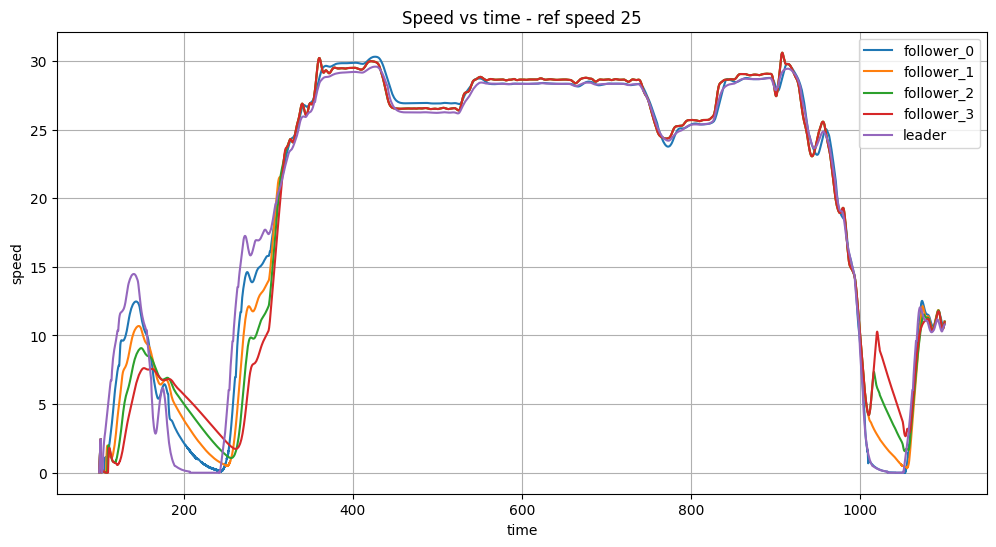

In [73]:
plot_time_vs_specific_col(data,'time','speed','Speed vs time - ref speed 25', start_time = 0.0 , end_time=5000)

Plotting from step 0 to 250000 (time 0.0 to 5000)
Data shape after slicing: (250000, 12)


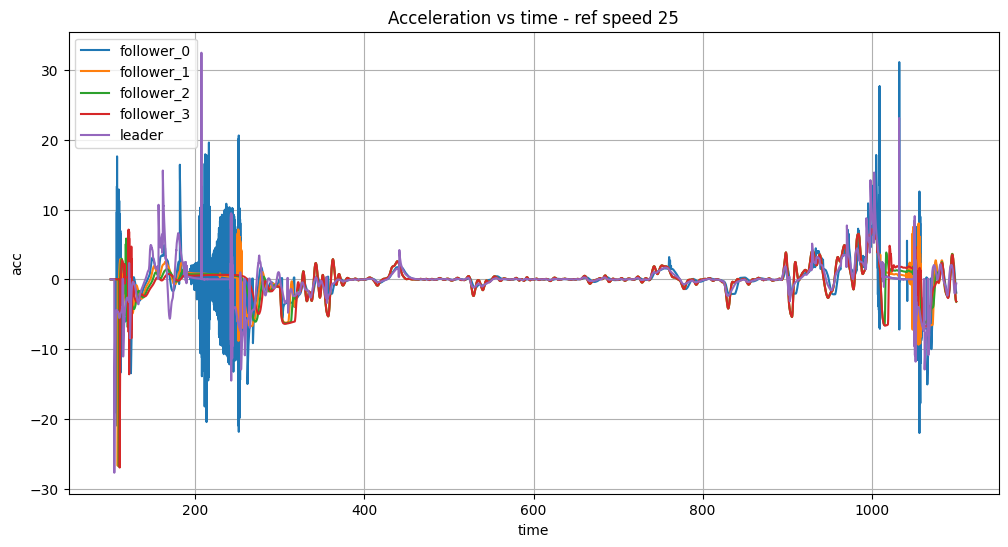

In [74]:
plot_time_vs_specific_col(data,'time','acc','Acceleration vs time - ref speed 25', start_time = 0.0 , end_time=5000)

Plotting from step 0 to 250000 (time 0.0 to 5000)
Data shape after slicing: (250000, 12)


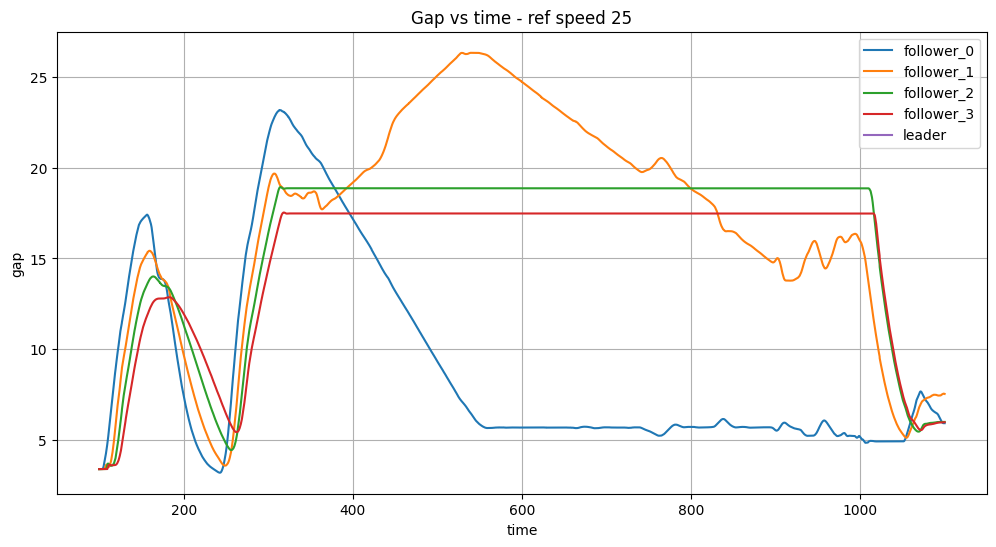

In [75]:
plot_time_vs_specific_col(data,'time','gap','Gap vs time - ref speed 25', start_time = 0.0 , end_time=5000)

Plotting from step 0 to 250000 (time 0.0 to 5000)
Data shape after slicing: (250000, 12)


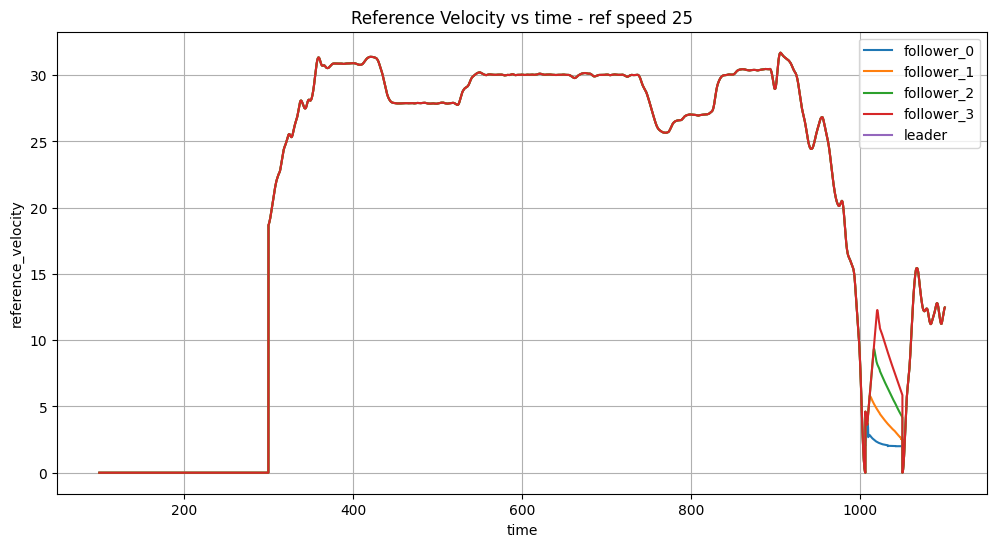

In [76]:
plot_time_vs_specific_col(data,'time', 'reference_velocity', 'Reference Velocity vs time - ref speed 25', start_time = 0.0 , end_time=5000)

# Plot command velocity vs gap distribution


In [48]:
def plot_command_velocity(data: pd.DataFrame, max_points: int = 1000, min_points: int = 0):

    # data = data.head(max_points)  # Limit to max_points for clarity
    # filter follower vehicles only
    data = data[data['name'] != 'leader']
    data = data.iloc[min_points:max_points]  # Start from min_points if specified
    plt.figure(figsize=(12, 6))
    for label, group in data.groupby('name'):
        if label != 'follower_2':
            if label == 'follower_0':
                data['command_velocity'] = data['command_velocity'] * 1.5
            else:
                data['command_velocity'] = data['command_velocity']
            plt.plot(group['time'], group['command_velocity'], label=f'cmd velocity {label}',)
            plt.plot(group['time'], group['reference_velocity'], linestyle='--', alpha=0.5 , label=f'Reference Velocity - {label}')
            plt.plot(group['time'], group['gap'], linestyle=':', alpha=0.5 , label=f'Gap - {label}')
    
    plt.title('Command Velocity vs Gap')
    plt.xlabel('Time (m)')
    plt.ylabel('Command Velocity (m/s)')
    plt.grid(True)
    plt.legend()
    # plt.xlim(0, data['gap'].max() + 5)
    # plt.ylim(0, data['speed'].max() + 5)
    plt.show()

/tmp/ipykernel_198324/3338251676.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


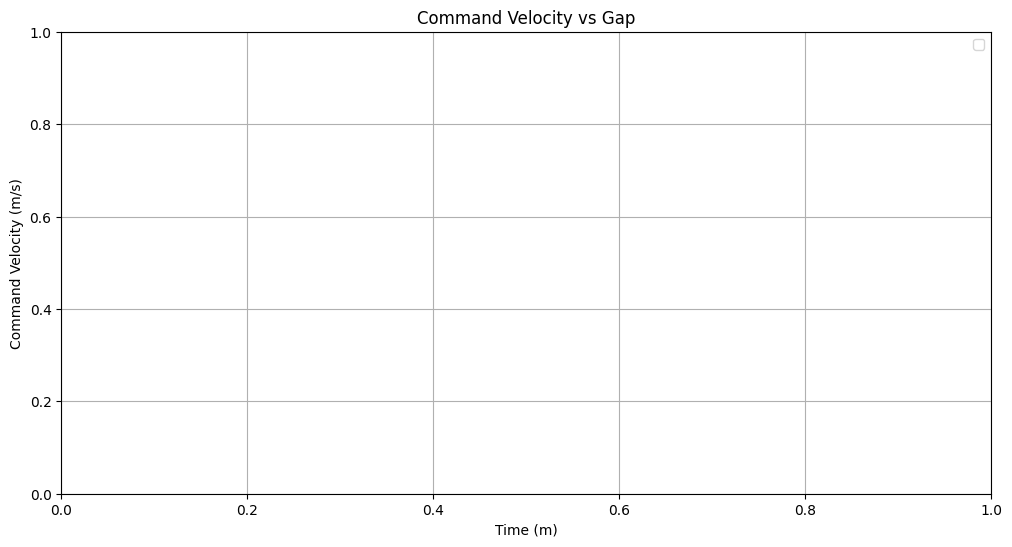

In [50]:
plot_command_velocity(data,5000,10000)

## Plot speed and time graph

In [66]:
def plot_follower_speed_profile(df, num_follower, follower, start_time: float = None, end_time: float = 0):
    
    # Slice the data range
    min_points = int(start_time / 0.02)
    max_points = int(end_time / 0.02)
    if follower !='leader':
        for i in range(1, num_follower+1):
            follower_name = f"follower_{i}"
        
            if i <= 1:
                imm_leader_name = 'leader'
                # leader_data = df[df['name'] == 'leader']
            else:
                imm_leader_name = f'follower_{i-1}'
            
            leader_data = df[df['name'] == imm_leader_name]
            # amplify the leader speed for better visualization
            # leader_data['speed'] = leader_data['speed'] * 1.2
            
            follower_data = df[df['name'] == follower_name]
            
            if follower_data.empty:
                print(f"[Warning] No data found for follower: {follower_name}")
                return
            if max_points is not None:
                follower_data = follower_data.iloc[min_points:max_points]
                leader_data = leader_data.iloc[min_points:max_points]
                # immediate_leader = 
            else:
                follower_data = follower_data.iloc[min_points:]

            plt.figure(figsize=(10, 6))
            
            plt.plot(leader_data['time'], leader_data['speed'], label=f'{imm_leader_name} Speed', color='red',linewidth=3)
            plt.plot(follower_data['time'], follower_data['speed'], label=follower_name)
            # plt.plot(follower_data['time'], follower_data['command_velocity'], label=f"{follower_name} Command Velocity", linestyle='--')
            plt.plot(follower_data['time'], follower_data['reference_velocity'], label=f"{follower_name} Reference Velocity", linestyle=':')
            plt.plot(follower_data['time'], follower_data['gap'], label=f"{follower_name} Gap", linestyle='-.')
            plt.xlabel('Time (s)')
            plt.ylabel('Speed (m/s)')
            if i<=0:
                plt.title(f'Speed Profile of {follower_name} and leader {imm_leader_name}')
            else:
                plt.title(f'Speed Profile of follower_{i+1} and leader {i}')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        follower_name = 'leader'
        follower_data = df[df['name'] == follower_name]
        if follower_data.empty:
            print(f"[Warning] No data found for follower: {follower_name}")
            return
        if max_points is not None:
            follower_data = follower_data.iloc[min_points:max_points]
        else:
            follower_data = follower_data.iloc[min_points:]

        plt.figure(figsize=(10, 6))
        
        plt.plot(follower_data['time'], follower_data['speed'], label=follower_name, color='red')
        plt.xlabel('Time (s)')
        plt.ylabel('Speed (m/s)')
        plt.title(f'Speed Profile of {follower_name}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


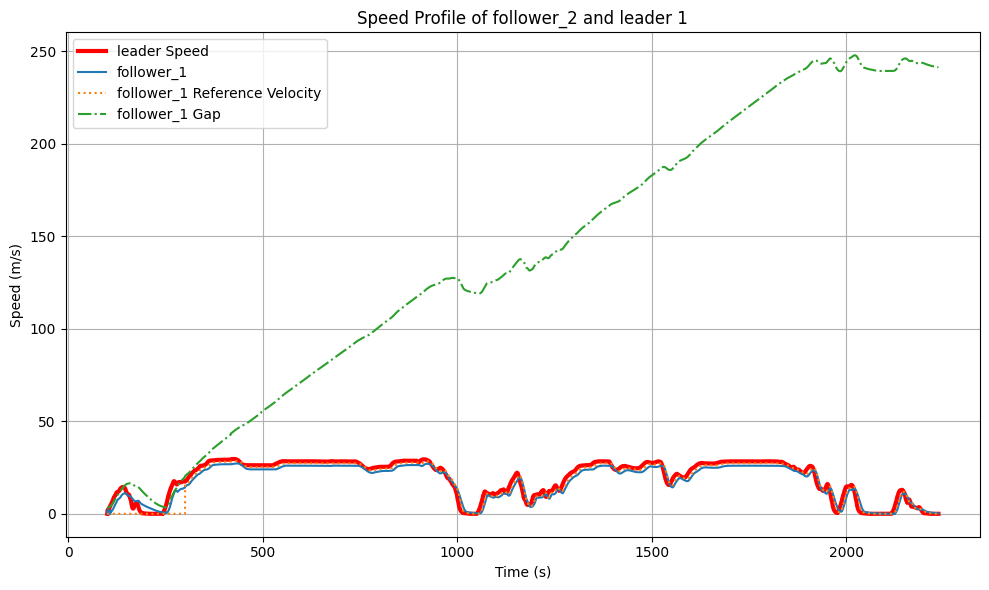

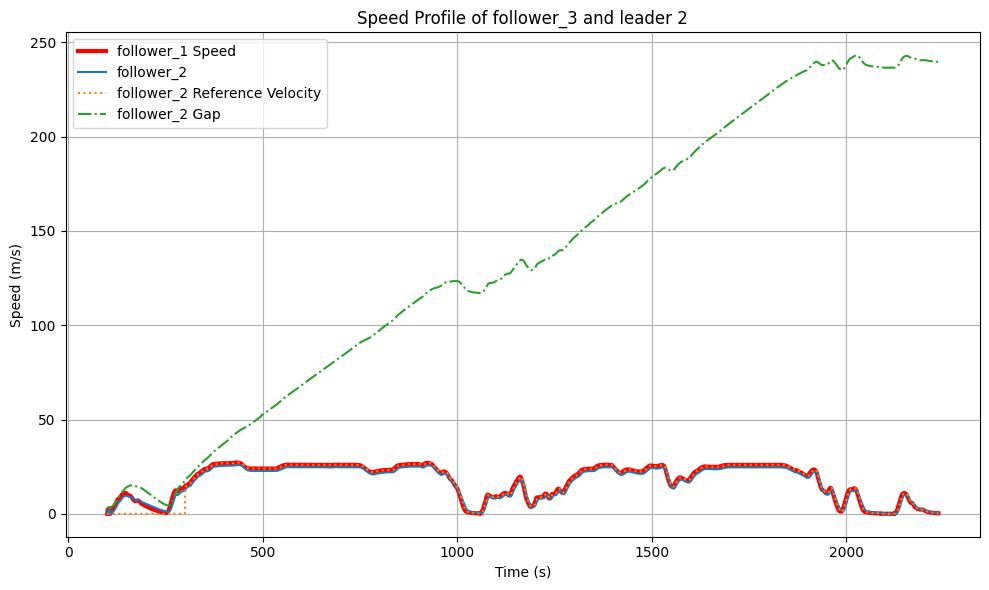

[Warning] No data found for follower: follower_3


In [67]:
plot_follower_speed_profile(data, num_follower=8, follower='follower', start_time=0.0, end_time=5000)

## Plot gap between vehicles

In [58]:
def plot_gap_over_time(data: pd.DataFrame, follower: str, max_points, min_points):
    follower_gap_data = data[data['name'] != 'leader']
    # leader_data = data[data['name'] == 'leader'][['time', 'speed']]
    plt.figure(figsize=(10, 6))
    if max_points:
        follower_gap_data = follower_gap_data.iloc[min_points:max_points]
        for idx, (name, group) in enumerate(follower_gap_data.groupby('name')):
            plt.plot(group['time'], group['gap'], label=name, linewidth=1)

    plt.title(f'Gap Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Gap (meters)')
    plt.legend()
    plt.grid(True)
    plt.show()

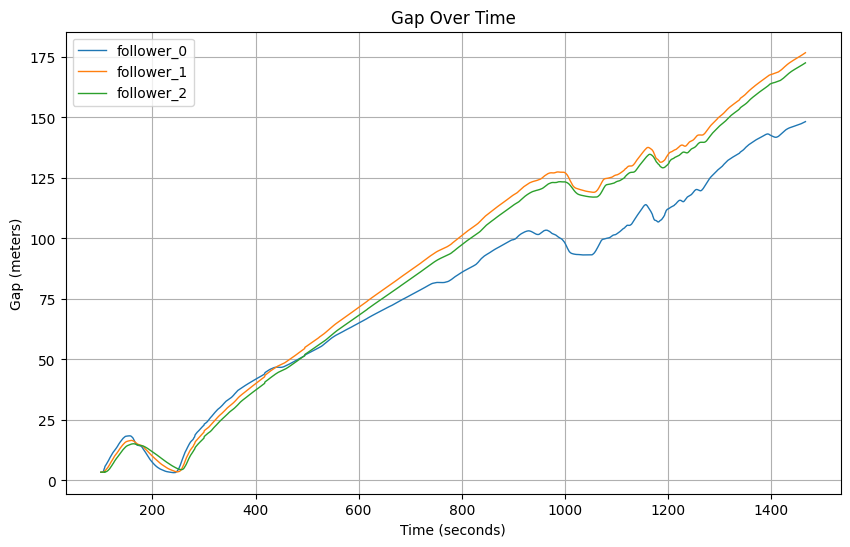

In [64]:
plot_gap_over_time(data, 'follower', max_points=205000,min_points=0)